# Tarefa 3

<b>Alunos:</b> Andreza(164213), Gil(225323) e Yan(118982)

## Importar bibliotecas básicas:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import time
from scipy.optimize import minimize, line_search
import pybobyqa
import warnings
warnings.filterwarnings('ignore')

## Plotando gráfico da função

Text(0.5, 0.92, "Superfície de Himmelblau - 2D")

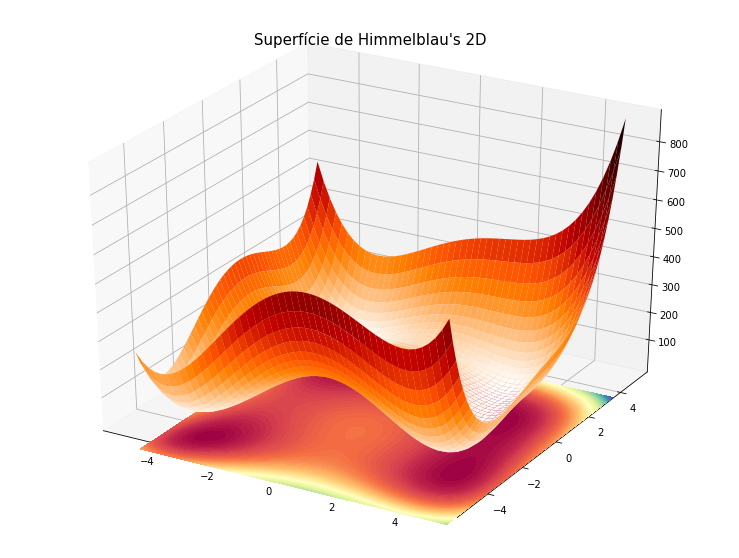

In [2]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

himmelblaus_func = lambda x,y: (x**2+y-11)**2 + (x+y**2-7)**2

# Cria a superfícia a ser plotada usando o intervalo X1 [-2, 2] e X2 [-1, 3]
surface_x1 = np.linspace(-5, 5)
surface_x2 = np.linspace(-5, 5)
surface_x1, surface_x2 = np.meshgrid(surface_x1, surface_x2)
function_surface = himmelblaus_func(surface_x1, surface_x2)
# Plot the surface
fig=plt.figure(figsize=(13, 10))

ax = plt.axes(projection='3d')
ax.plot_surface(surface_x1, surface_x2, function_surface, cmap=cm.gist_heat_r, rcount=100, ccount=100, norm=colors.Normalize(vmin=function_surface.min(), vmax=function_surface.max()))
ax.contourf(surface_x1, surface_x2, function_surface, levels=100, zdir='z', offset=np.min(function_surface)-100, cmap='Spectral', norm=colors.Normalize(vmin=function_surface.min(), vmax=function_surface.max()))

ax.set_title("Superfície de Himmelblau's 2D", fontsize=15)


Como podemos perceber, a função não é convexa, com quatro pontos de mínimo locais com a função atingindo os mesmo valores:
<br>
<br>
$f(3.0,2.0)=0.0$<br>
$f(-2.8,3.1)=0.0$<br>
$f(-3.8,-3.3)=0.0$<br>
$f(3.6,-1.8)=0.0$<br>

## Definindo algumas funções

In [3]:
#Reseta variáveis globais:
def reset():
    global ngrad
    global nf
    nf = 0
    ngrad = 0

def himmelblaus_func(x):
    global nf
    nf +=1
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2
    
#Função que calcula o gradiente:
def grad(x:np.array) -> list:
    global ngrad
    ngrad += 1
    df_dx = 2*(x[0]**2 + x[1] - 11)*(2*x[0]) + 2*(x[0] + x[1]**2 - 7)
    df_dy = 2*(x[0]**2 + x[1] - 11) + 2*(x[0] + x[1]**2 - 7)*(2*x[1])
    return np.array([df_dx,df_dy])

# ---------------------------------------------------------------------

#Função de descida do gradiente de busca em linha
def descida(f, grad, x0):
    ninter=0
    ngrad=0
    x=x0
    while ninter < 1e5:
        pk = -grad(x)
        res = line_search(f, grad, x, pk)
        x_new = x + res[0]*pk
        tol = np.linalg.norm(x - x_new) / np.linalg.norm(x_new)
        if tol < 1e-5:
            break
        x = x_new
        ninter += 1
    final_resp = [res, x, ninter]
    return final_resp

# ---------------------------------------------------------------------

#Função que imprime as respostas
def respostas(res, start, method):
    time_elapsed = time.time() - start
    if method=='CG':
        print("x = ({:.2f},{:.2f})".format(res.x[0], res.x[1]))
        print("f(x) = {:.2f}".format(res.fun))
        print("n chamadas função = {} ".format(res.nfev))
        print("n chamadas gradiente = {} ".format(res.njev))
        print("tempo de execução = {:.3f} segundos".format(time_elapsed))
    elif method=='LS':
        print("x = ({:.2f},{:.2f})".format(res[-2][0], res[-2][1]))
        print("f(x) = {:.2f}".format(res[0][3]))
        print("n chamadas função = {} ".format(nf))
        print("n chamadas gradiente = {} ".format(ngrad))
        print("tempo de execução = {:.3f} segundos".format(time_elapsed))
        print("n interações = {} ".format(res[-1]))
    elif method=='BFGS':
        print("x = ({:.2f},{:.2f})".format(res.x[0], res.x[1]))
        print("f(x) = {:.2f}".format(res.fun))
        print("n chamadas função = {} ".format(res.nfev))
        print("n chamadas gradiente = {} ".format(ngrad))
        print("tempo de execução = {:.3f} segundos".format(time_elapsed))
    elif method=='NM':
        print("x = ({:.2f},{:.2f})".format(res.x[0], res.x[1]))
        print("f(x) = {:.2f}".format(res.fun))
        print("n chamadas função = {} ".format(res.nfev))
        print("tempo de execução = {:.3f} segundos".format(time_elapsed))
    elif method=='BOBYQA':
        print("x = ({:.2f},{:.2f})".format(res.x[0], res.x[1]))
        print("f(x) = {:.2f}".format(res.f))
        print("n chamadas função = {} ".format(res.nf))
        print("tempo de execução = {:.3f} segundos".format(time_elapsed))
    else:
        print('Error: method not found')

In [4]:
ngrad=0
nf=0

## Conjugado do gradiente

In [5]:
x0 = np.array([4, 4])
start = time.time()
conj_grad = minimize(himmelblaus_func, x0, method='CG', jac=grad)
respostas(conj_grad, start, method='CG')

x = (3.00,2.00)
f(x) = 0.00
n chamadas função = 17 
n chamadas gradiente = 17 
tempo de execução = 0.001 segundos


## Descida do gradiente com busca em linha

In [6]:
reset()
x0 = np.array([4,4])
start = time.time()
ls = descida(himmelblaus_func, grad, x0)
respostas(ls, start, method='LS')

x = (-3.78,-3.28)
f(x) = 0.00
n chamadas função = 89 
n chamadas gradiente = 39 
tempo de execução = 0.005 segundos
n interações = 12 


## Nelder-Mead

In [7]:
x0=[[-4,-4],[-4,1],[4,-1]]
x=[4,4]
start = time.time()
nelder_mead=minimize(himmelblaus_func, x, method='Nelder-Mead', options={'initial_simplex': x0})
respostas(nelder_mead, start, method='NM')

x = (3.58,-1.85)
f(x) = 0.00
n chamadas função = 77 
tempo de execução = 0.003 segundos


## BFGS
O BFGS pode receber ou não o gradiente. Abaixo veremos as duas versões
### Sem gradiente

In [8]:
reset()
x0=[4, 4]
start = time.time()
BFGS=minimize(himmelblaus_func, x0, method='L-BFGS-B')
respostas(BFGS, start, method='BFGS')

x = (3.00,2.00)
f(x) = 0.00
n chamadas função = 30 
n chamadas gradiente = 0 
tempo de execução = 0.003 segundos


### Com gradiente

In [9]:
reset()
x0=[4, 4]
start = time.time()
BFGS=minimize(himmelblaus_func, x0, method='L-BFGS-B', jac=grad)
respostas(BFGS, start, method='BFGS')

x = (3.00,2.00)
f(x) = 0.00
n chamadas função = 10 
n chamadas gradiente = 10 
tempo de execução = 0.001 segundos


## NEWOA ou BOBYQA

In [10]:
x0=[4,4]
start = time.time()
BOBYQA = pybobyqa.solve(himmelblaus_func, x0)
respostas(BOBYQA, start, method='BOBYQA')

x = (3.00,2.00)
f(x) = 0.00
n chamadas função = 58 
tempo de execução = 0.112 segundos


## Conclusão
Percebemos que os algoritmos de <b>Conjugado do Gradiente</b>, <b>BFGS</b> e <b>BOBYQA</b> atingiram o mesmo ponto de mínimo, (3,2).
<br>
Já a descida do gradiente com <b>Busca em Linha</b> encontrou o ponto mínimo (-3.8,-3.3) e o <b>Nelder-Mead</b> econtrou o ponto mínimo (3.6,-1.8).
<br>
<b>Nenhum</b> dos algoritmos aqui testados encontrou o 4º ponto de minimo da nossa função em (−2.8,3.1).<br>
Observamos que o número de chamadas da função, bem como de chamadas do cálculo do gradiente, não é definitivo para decidir se o algorítmo terá melhor ou pior desempenho de tempo.
